# Uso del Caos para Transmitir Mensajes Encriptados

## Ejercicio 3

In [1]:
using ChaosCrypto

In [2]:
using PyPlot

In [3]:
using Interact

### Ecuaciones de Lorenz

$\frac{dx}{dt}= \sigma (y - x)$

$\frac{dy}{dt} = rx -y -xz$

$\frac{dz}{dt} = xy -bz$

Las ecuaciones de quien recibe el mensaje

$xr=σ(yr−xr)$

$yr=ρs(t)−yr−s(t)zr$

$zr=s(t)yr−βzr$

donde

$s(t)=x(t)+m(t)$ 

y  

$m(t)=sin(t)$


Los parámetros son:

In [4]:
ρ = 60
σ = 10
β = 8/3

2.6666666666666665

In [5]:
function lorenzSinTaylor(xx, t) 
    x, y, z, xr, yr, zr = xx #6 ecuaciones de Lorenz
    φ = 0.001 
    m = sin(φ*t) #Mensaje, señal
    #t = linspace(0, 2π/φ, 360) 
    #h = Array(t) #Arreglo de linspace
    
    
    s = x + m #es un arreglo
    #s = Array(Float64,length(t)) #s es un arreglo de tamaño t de números flotantes
    #for i in eachindex(t)#1:360 Para cada i de t
    #    s[i] = sin(φ*t[i]) #Entrada i del arreglo s
    #end
    
    
        #Entrada 1 de xx, correspondiente a la ecuación x
#    [AD.Taylor(x, [σ*y - x]), #* (AD.Taylor(x, [y]) - AD.Taylor(x, [x])),
        #Entrada 2 de xx, correspondiente a la ecuación y
#    AD.Taylor(y, [ρ*x - y - x*z]), #* AD.Taylor(y, [x])) - AD.Taylor(y,[y]) - (AD.Taylor(y, [x]) * AD.Taylor(y, [z])), 
        #Entrada 3 de xx, correspondiente a la ecuación z
#    AD.Taylor(z, [x*y - β*z]), #* AD.Taylor(z, [y])) - (AD.Taylor(z, [β]) * AD.Taylor(z, [z])),
        #Entrada 4 de xx, correspondiente a la ecuación xr
#    AD.Taylor(xr, [σ*yr - xr]), #* (AD.Taylor(xr, [yr])) - AD.Taylor(xr, [xr])),
        #Entrada 5 de xx, correspondiente a la ecuación yr
#    AD.Taylor(yr, [ρ*s - yr - s*zr]), #* AD.Taylor(yr, [s])) - AD.Taylor(yr, [yr]) - (AD.Taylor(yr, [s]) * AD.Taylor(yr, [zr])),
        #Entrada 6 de xx, correspondiente a la ecuación zr
#    AD.Taylor(zr, [s*yr - β*zr])] #* AD.Taylor(zr, [yr])) -  (AD.Taylor(zr, [β]) * AD.Taylor(zr, [zr]))]




        #Entrada 1 de xx, correspondiente a la ecuación x
    [AD.Taylor(x, [σ]) * (AD.Taylor(x, [y]) - AD.Taylor(x, [x])),
        #Entrada 2 de xx, correspondiente a la ecuación y
    (AD.Taylor(y, [ρ]) * AD.Taylor(y, [x])) - AD.Taylor(y,[y]) - (AD.Taylor(y, [x]) * AD.Taylor(y, [z])), 
        #Entrada 3 de xx, correspondiente a la ecuación z
    (AD.Taylor(z, [x]) * AD.Taylor(z, [y])) - (AD.Taylor(z, [β]) * AD.Taylor(z, [z])),
        #Entrada 4 de xx, correspondiente a la ecuación xr
    (AD.Taylor(xr, [σ]) * (AD.Taylor(xr, [yr])) - AD.Taylor(xr, [xr])),
        #Entrada 5 de xx, correspondiente a la ecuación yr
    (AD.Taylor(yr, [ρ]) * AD.Taylor(yr, [s])) - AD.Taylor(yr, [yr]) - (AD.Taylor(yr, [s]) * AD.Taylor(yr, [zr])),
        #Entrada 6 de xx, correspondiente a la ecuación zr
    (AD.Taylor(zr, [s]) * AD.Taylor(zr, [yr])) -  (AD.Taylor(zr, [β]) * AD.Taylor(zr, [zr]))]




end

lorenzSinTaylor (generic function with 1 method)

In [6]:
#Integrador usando la función lorenzSinTaylor del módulo LO 
#con condición inicial 1.0 para las 6 ecuaciones y tiempo final 30.0

xsSinTaylor, tsSinTaylor = LO.integrador([1.0,1.0,1.0,1.0,1.0,1.0], lorenzSinTaylor, 30.0) 

([[1.0,1.0,1.0,1.0,1.0,1.0],[1.0,1.0579995,0.9983333333333333,1.0089995,1.0579995,0.9983333333333333],[1.000579995,1.1159426381669166,0.996729110611111,1.0185699910002501,1.1159426971685833,0.9967291116691106],[1.0017336214316692,1.173863630048919,0.9951877561954654,1.0287103386959402,1.1738638069970377,0.9951877595415649],[1.0034549215178417,1.231796283737937,0.99370982084414,1.0394197520720452,1.231796637520104,0.9937098278801628],[1.0057383351400426,1.2897740238368411,0.9922959800317798,1.050697778985298,1.2897746132831494,0.992295992331231],[1.0085786920270106,1.3478299149274717,0.9909470325978023,1.0625443019902547,1.3478307988101887,0.9909470519061567],[1.0119712042560152,1.4059966845572018,0.9896638997102138,1.0749595344042153,1.405997921590438,0.9896639279455295],[1.015911459059027,1.4643067457612648,0.9884476241357046,1.0879440166059482,1.4643083946006283,0.9884476633895535],[1.0203954119260494,1.5227922191376333,0.9872993698072724,1.1014986125633401,1.5227943383798732,0.98729

In [7]:
#Entradas 1 y 4 de la tercera entrada de la integración (xsSinTaylor, tsSinTaylor)

xsSinTaylor[3][1], xsSinTaylor[3][4] 

(1.000579995,1.0185699910002501)

In [8]:
xsSinTaylor[3][2], xsSinTaylor[3][5]

(1.1159426381669166,1.1159426971685833)

In [9]:
xxST = Float64[] #Es un número flotante
xxrST = Float64[] #Es un número flotante

for i = 1:length(xsSinTaylor) #Para cada i desde 1 hasta tamaño del arreglo de xxSinTaylor
    push!(xxST, xsSinTaylor[i][1]) #Agregar el número xxST al arreglo xsSinTaylor
    push!(xxrST, xsSinTaylor[i][4])
end

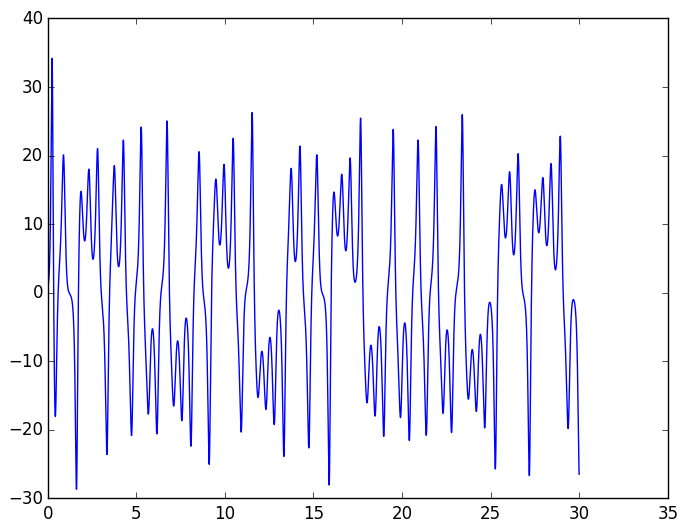

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31a38df90>

In [10]:
#Gráfica de x 
plot(tsSinTaylor, xxST)

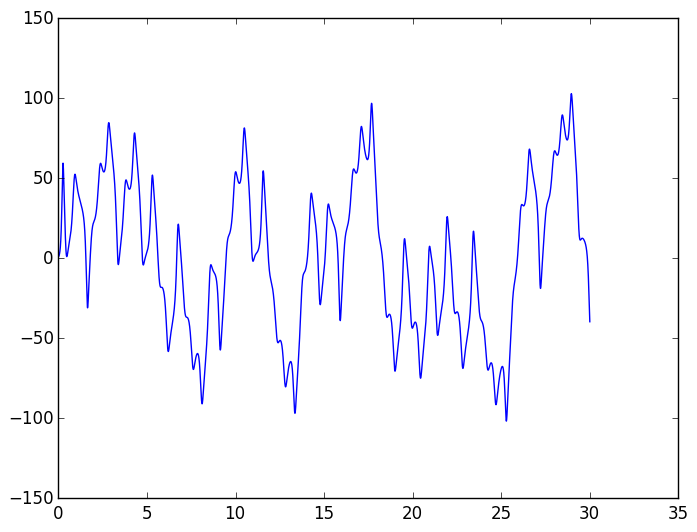

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31aa45790>

In [11]:
#Gráfica de xr
plot(tsSinTaylor, xxrST)

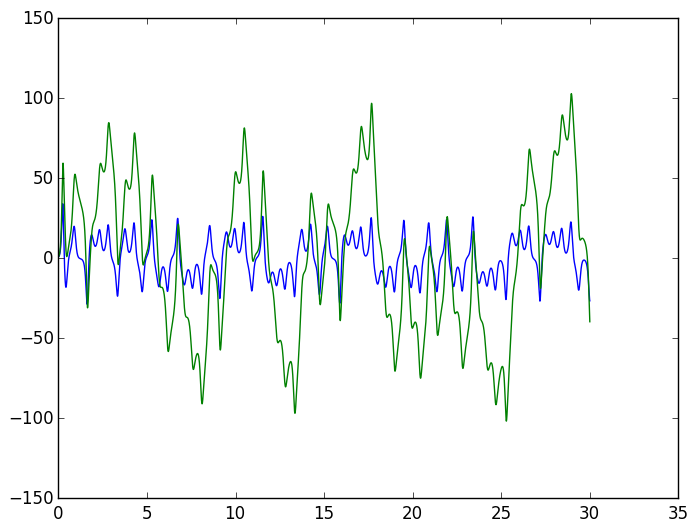

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ac72d10>
 PyObject <matplotlib.lines.Line2D object at 0x31ac72fd0>

In [12]:
#Gráfica de x y xr
plot(tsSinTaylor, xxST, tsSinTaylor, xxrST)

In [13]:
xxST = Float64[]
xxrST = Float64[]
for i = 1:length(xsSinTaylor)
    push!(xxST, xsSinTaylor[i][2])
    push!(xxrST, xsSinTaylor[i][5])
end

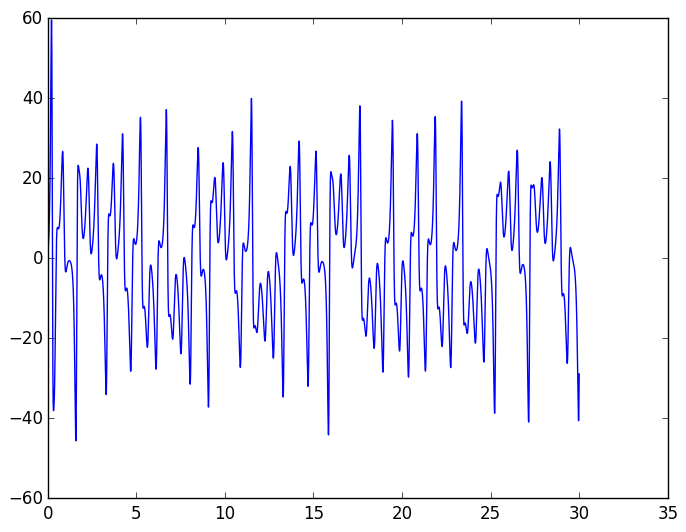

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31afce6d0>

In [14]:
#Gráfica de y 
plot(tsSinTaylor, xxST)

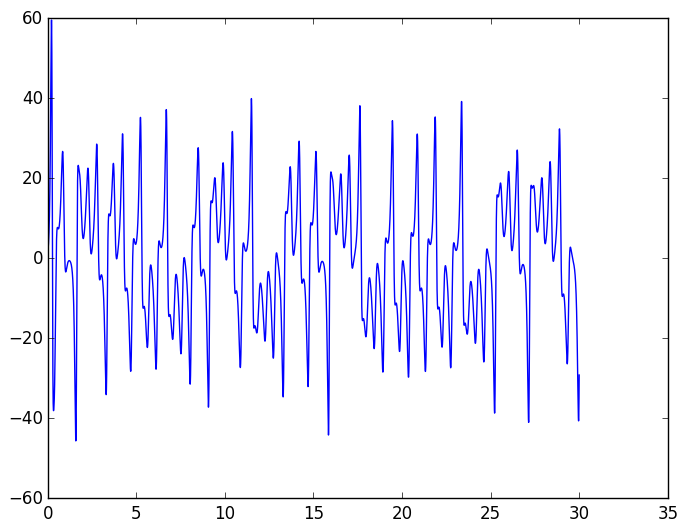

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31b310790>

In [15]:
#Gráfica de yr
plot(tsSinTaylor, xxrST)

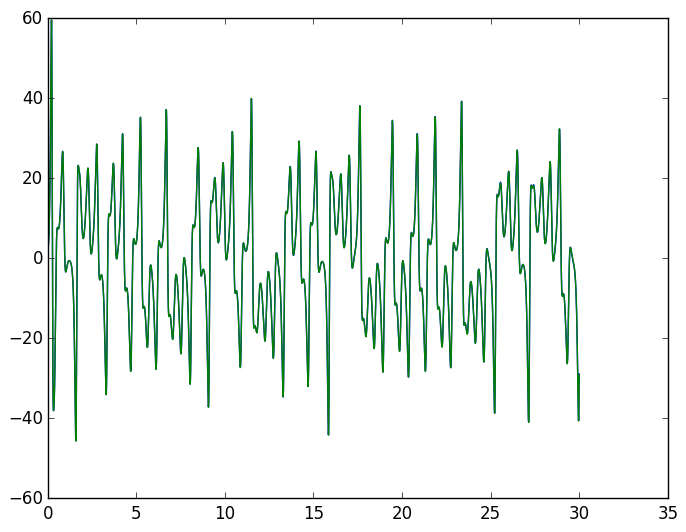

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31b629b90>
 PyObject <matplotlib.lines.Line2D object at 0x31b629e50>

In [16]:
#Gráfica de y y yr
plot(tsSinTaylor, xxST, tsSinTaylor, xxrST)

In [17]:
xxST = Float64[]
xxrST = Float64[]
for i = 1:length(xsSinTaylor)
    push!(xxST, xsSinTaylor[i][3])
    push!(xxrST, xsSinTaylor[i][6])
end

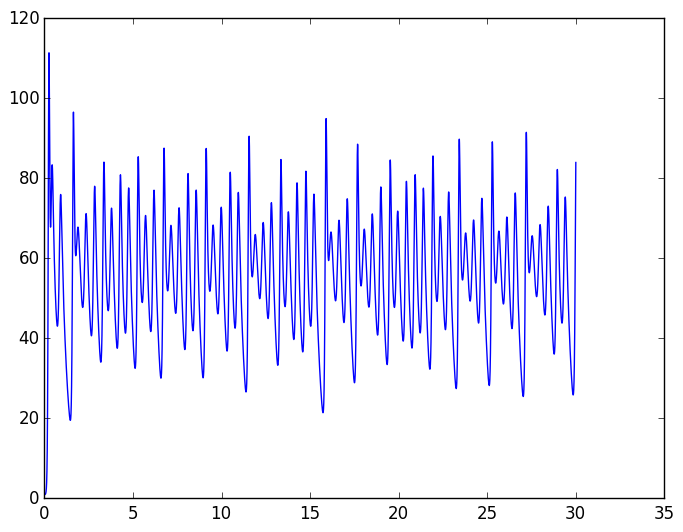

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31ba6c7d0>

In [18]:
#Gráfica de z
plot(tsSinTaylor, xxST)

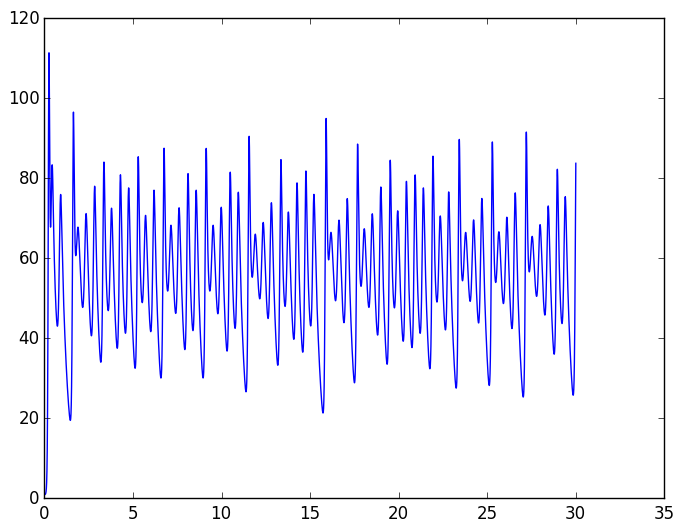

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31bba6bd0>

In [19]:
#Gráfica de zr
plot(tsSinTaylor, xxrST)

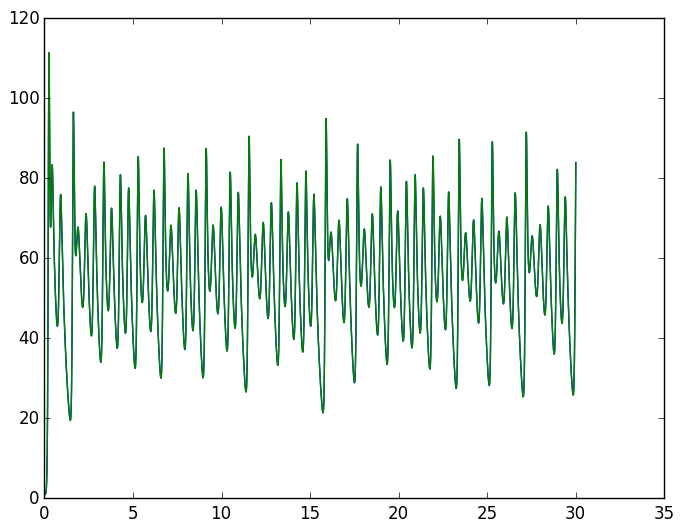

2-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31c1590d0>
 PyObject <matplotlib.lines.Line2D object at 0x31c159390>

In [20]:
#Gráfica de z y zr
plot(tsSinTaylor, xxST, tsSinTaylor, xxrST)

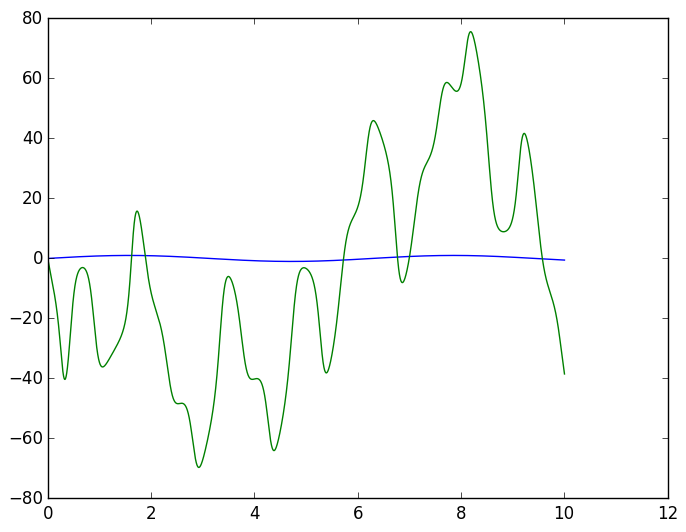

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31f3529d0>

In [29]:

ρ = 60
σ = 10
β = 8/3



function lorenzSinTaylor(xx, t) 
    x, y, z, xr, yr, zr = xx #6 ecuaciones de Lorenz
    φ = 0.001 
    m = sin(φ*t) #Mensaje, señal
    s = x + m 

        #Entrada 1 de xx, correspondiente a la ecuación x
    [AD.Taylor(x, [σ]) * (AD.Taylor(x, [y]) - AD.Taylor(x, [x])),
        #Entrada 2 de xx, correspondiente a la ecuación y
    (AD.Taylor(y, [ρ]) * AD.Taylor(y, [x])) - AD.Taylor(y,[y]) - (AD.Taylor(y, [x]) * AD.Taylor(y, [z])), 
        #Entrada 3 de xx, correspondiente a la ecuación z
    (AD.Taylor(z, [x]) * AD.Taylor(z, [y])) - (AD.Taylor(z, [β]) * AD.Taylor(z, [z])),
        #Entrada 4 de xx, correspondiente a la ecuación xr
    (AD.Taylor(xr, [σ]) * (AD.Taylor(xr, [yr])) - AD.Taylor(xr, [xr])),
        #Entrada 5 de xx, correspondiente a la ecuación yr
    (AD.Taylor(yr, [ρ]) * AD.Taylor(yr, [s])) - AD.Taylor(yr, [yr]) - (AD.Taylor(yr, [s]) * AD.Taylor(yr, [zr])),
        #Entrada 6 de xx, correspondiente a la ecuación zr
    (AD.Taylor(zr, [s]) * AD.Taylor(zr, [yr])) -  (AD.Taylor(zr, [β]) * AD.Taylor(zr, [zr]))]
    
end


xs, ts = LO.integrador([1.0,1.0,1.0,1.0,10.0,10.0], lorenzSinTaylor, 10.0)
    φ = 0.001
    m = sin(ts) #señal
    s = [x[1] for x in xs] + m #s = x + m
    mhat = s - [x[4] for x in xs] #mensaje recibido, que es s - xr 
    
    plot(ts,m) #Gráfica de la señal o mensaje
    plot(ts,mhat) #Gráfica del mensaje recibido
    
#    plot(ts,[x[1] for x in xs]) #Gráfica de x en el tiempo
#    plot(ts,[x[4] for x in xs]) #Gráfica de xr en el tiempo
#    plot(ts,[x[1]-x[4] for x in xs]) #Gráfica de la diferencia entre x y xr en el tiempo



#end

#end # @manipulate

In [ ]:
function lorenzSinTaylor(xx, t) 
    x, y, z, xr, yr, zr = xx #6 ecuaciones de Lorenz
    φ = 0.001 
    m = sin(φ*t) #Mensaje, señal
    s = x + m 



In [25]:
φ

0.001

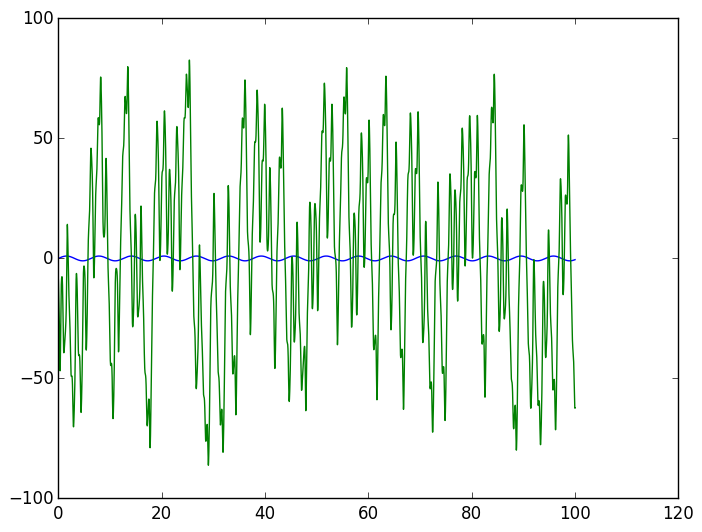

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x31a7acd50>

In [22]:

ρ = 60
σ = 10
β = 8/3


function lorenzSin(xx,t)
    x, y, z, xr, yr, zr = xx
    m = sin(φ*t/10)
    s = x + m
    
    [σ*(y-x), (ρ*x - y - x*z), x*y-β*z,
     σ*(yr-xr), (ρ*s - yr - s*zr) , (s*yr - β*zr)]
end

xs, ts = LO.integrador([1.0,1.0,1.0,10.0,10.0,10.0], lorenzSinTaylor, 100.0)
    
m = sin(ts)
s = [x[1] for x in xs] + m
mhat = s - [x[4] for x in xs]
    plot(ts,m) #Graficar ts contra sen, el mensaje
    plot(ts,mhat) #Graficar ts contra el mensaje recibido